In [1]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor
from src.utils.cross_validation import CrossValidation
from src.models.random_forest_regression import RandomForestRegression

import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor


In [2]:
ds = xr.load_dataset(r'C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor\data\intermediate\CV_results\performance_cube_2.nc')
ds = ds.squeeze()
ds = ds.mean(dim='cv_fold')
df = ds.to_dataframe().reset_index()
df

,max_depth,min_samples_split,min_samples_leaf,max_features,max_samples,mse,n_estimators,min_weight_fraction_leaf
0,30,2,1,0.6,0.9,0.001625,30,0.0
1,30,2,1,0.6,0.95,0.001606,30,0.0
2,30,2,1,0.6,1.0,0.001600,30,0.0
3,30,2,1,0.7,0.9,0.001626,30,0.0
4,30,2,1,0.7,0.95,0.001604,30,0.0
...,...,...,...,...,...,...,...,...
475,None,5,2,0.9,0.95,0.001662,30,0.0
476,None,5,2,0.9,1.0,0.001654,30,0.0
477,None,5,2,1.0,0.9,0.001674,30,0.0
478,None,5,2,1.0,0.95,0.001663,30,0.0


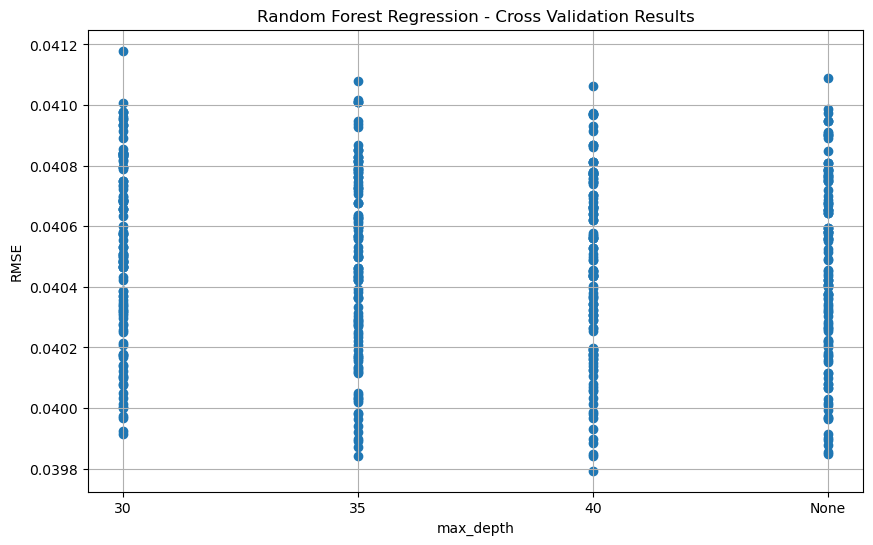

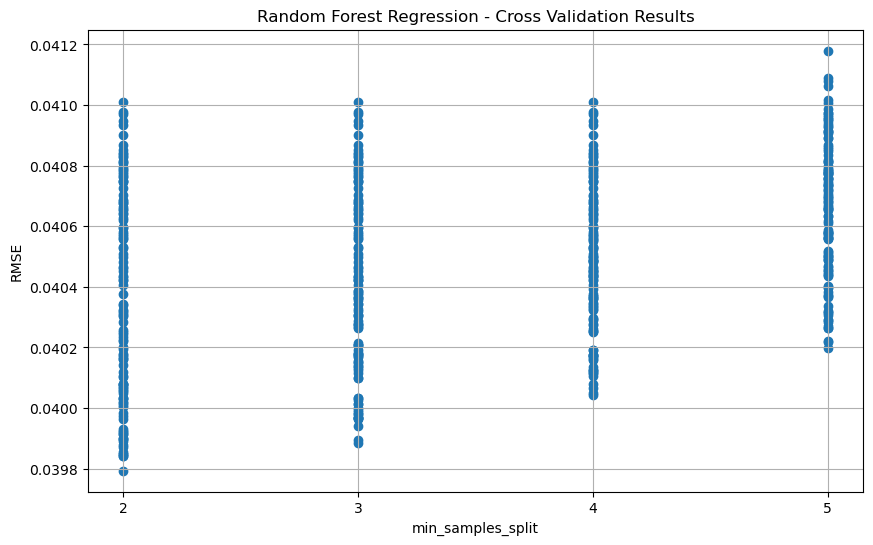

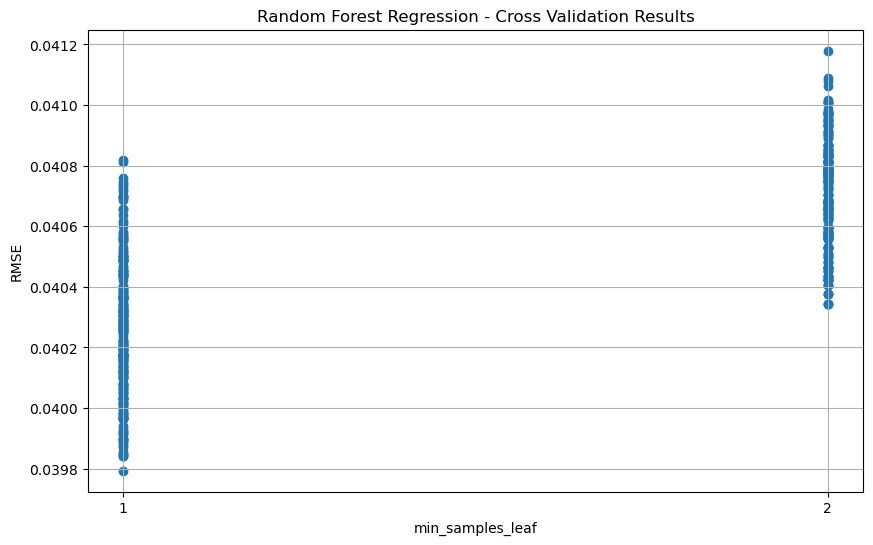

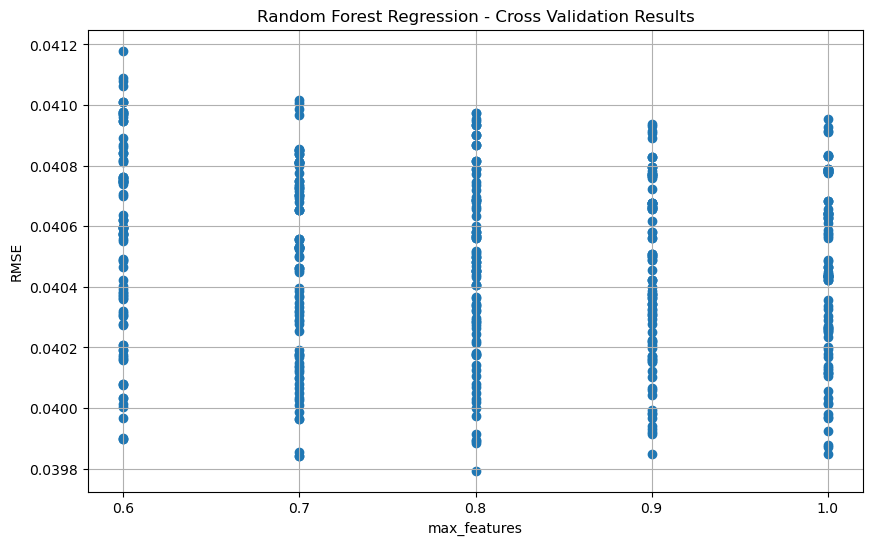

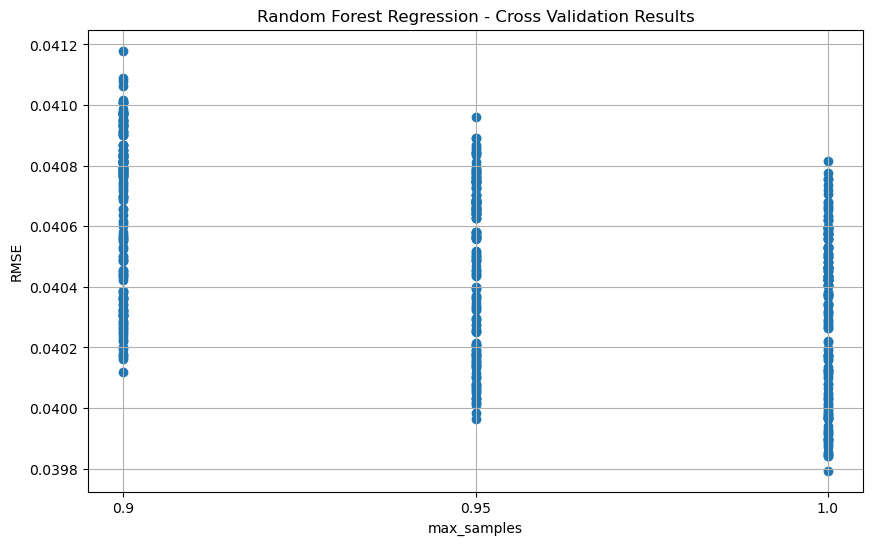

In [3]:
tunes = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_samples']

for tune in tunes:
    plt.figure(figsize=(10,6))
    plt.scatter(df[tune], df['mse']**0.5, marker='o', label=tune)
    plt.xlabel(tune)
    plt.ylabel('RMSE')
    plt.title('Random Forest Regression - Cross Validation Results')
    plt.grid()
    plt.show()

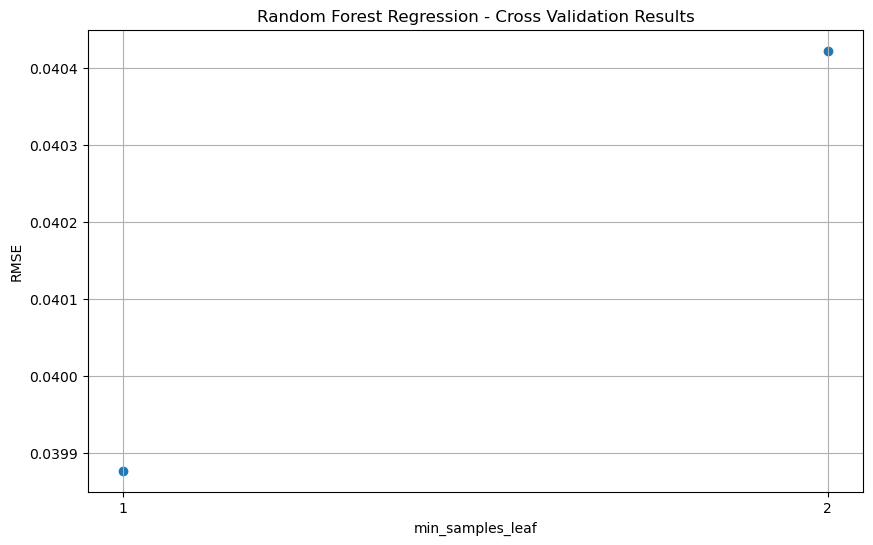

In [15]:
ds = xr.load_dataset(r'C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor\data\intermediate\CV_results\performance_cube_test.nc')
ds = ds.squeeze()
ds = ds.mean(dim='cv_fold')
df = ds.to_dataframe().reset_index()
df

tunes = ['min_samples_leaf']

for tune in tunes:
    plt.figure(figsize=(10,6))
    plt.scatter(df[tune], df['mse']**0.5, marker='o', label=tune)
    plt.xlabel(tune)
    plt.ylabel('RMSE')
    plt.title('Random Forest Regression - Cross Validation Results')
    plt.grid()
    plt.show()